Посмотрим, как с помощью ядрового метода опорных векторов можно решать задачи классификации с нелинейной зависимостью целевой переменной от признаков.

Сгенерируем данные для задачи.

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X, y = make_circles(100, factor=.1, noise=.1)

Ниже указана функция для визуализации разделяющей поверхности и разделяющей полосы метода опорных векторов.

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Сначала обучим линейный метод опорных векторов и нарисуем результат.

In [4]:
model_linear = SVC(kernel='linear')

In [5]:
model_linear.fit(X,y)

SVC(kernel='linear')

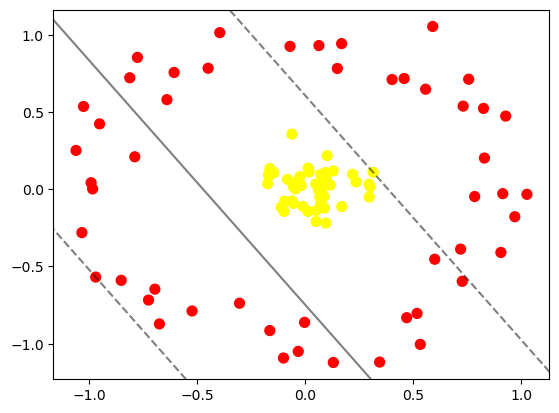

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn' )
plot_svc_decision_function(model_linear, plot_support=False)

Очевидно, метод плохо справился с решением задачи.

Попробуем другое ядро, например, сигмоидальное.

Среди стандартных ядер в sklearn есть:
*  rbf,
*  sigmoid,
*  poly.

Явные формулы для этих преобразований довольно сложные, их можно изучить в [документации библиотеки](https://scikit-learn.org/stable/modules/svm.html#svm-kernels).

Попробуем применить SVM с сигмоидальным ядром.

In [7]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X,y)

SVC(kernel='sigmoid')

In [9]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X,y)

SVC()

А теперь — SVM с радиальным ядром.

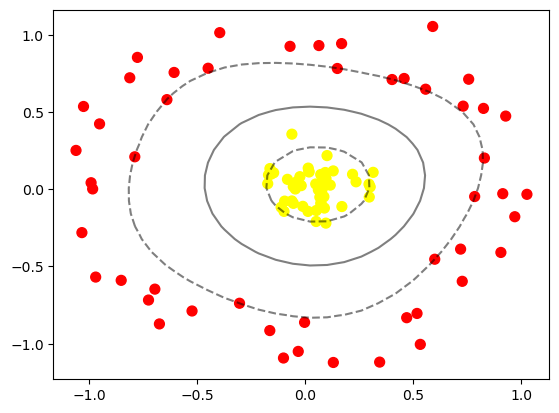

In [10]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn' )
plot_svc_decision_function(model_rbf, plot_support=False)

SVM с радиальным ядром очень хорошо сработал на таких данных, потому что в данных легко угадываются круги. На практике, однако, подобрать нужное ядро не всегда просто, и нет гарантии, что подбор ядра из списка стандартных ядер sklearn поможет методу хорошо справиться с задачей классификации. Но нужно пробовать!